In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_afsnt = pd.read_csv('./data/AFSNT.csv')
data_sfsnt = pd.read_csv('./data/SFSNT.csv')
data_afsnt_dly = pd.read_csv('./data/AFSNT_DLY.csv')

In [3]:
data_afsnt['NUM'] = data_afsnt['DLY'].apply(lambda x : 0 if x == 'N' else 1)

In [4]:
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR,NUM
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN,0
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN,0
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN,0


In [5]:
data_afsnt_dly.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,AOD,STT,DLY,DLY_RATE
0,2019,9,16,월,ARP1,ARP3,L,L1702,A,9:05,NaN,NaN
1,2019,9,16,월,ARP3,ARP1,L,L1702,D,7:55,NaN,NaN
2,2019,9,16,월,ARP1,ARP3,L,L1720,A,14:40,NaN,NaN


In [6]:
sta_list = list(data_sfsnt[data_sfsnt['STA'].isna()==True].index)
std_list = list(data_sfsnt[data_sfsnt['STD'].isna()==True].index)
all_list = []
for i,j in zip(sta_list,std_list):
    all_list.append(i)
    all_list.append(j)
all_list = list(set(all_list))
data_sfsnt.drop(all_list,axis=0,inplace=True)

In [7]:
# data_sfsnt['STA'] = data_sfsnt['STA'].fillna()
data_sfsnt.info()
data_afsnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 1185
Data columns (total 17 columns):
SSC    1150 non-null object
FLT    1150 non-null object
ORG    1150 non-null object
DES    1150 non-null object
STD    1150 non-null object
STA    1150 non-null object
FLO    1150 non-null object
MON    728 non-null object
TUE    719 non-null object
WED    718 non-null object
THU    715 non-null object
FRI    722 non-null object
SAT    721 non-null object
SUN    701 non-null object
FSD    1150 non-null int64
FED    1150 non-null int64
IRR    1150 non-null object
dtypes: int64(2), object(15)
memory usage: 161.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987709 entries, 0 to 987708
Data columns (total 18 columns):
SDT_YY    987709 non-null int64
SDT_MM    987709 non-null int64
SDT_DD    987709 non-null int64
SDT_DY    987709 non-null object
ARP       987709 non-null object
ODP       987709 non-null object
FLO       987709 non-null object
FLT       987709 non-null object
R

In [8]:
data_afsnt['HOUR'] = data_afsnt['STT'].apply(lambda x : int(x.split(':')[0]))
data_afsnt['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_afsnt['ARP'], data_afsnt['ODP'])]
data_afsnt_dly['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_afsnt_dly['ARP'], data_afsnt_dly['ODP'])]
data_sfsnt['GROUP'] = [sorted([i,j])[0] + sorted([i,j])[1] for i,j in zip(data_sfsnt['ORG'], data_sfsnt['DES'])]
data_afsnt['MINUTE'] = data_afsnt['STT'].apply(lambda x : int(x.split(':')[1]))

data_sfsnt['STD_HOUR'] = data_sfsnt['STD'].apply(lambda x : int(x.split(':')[0]))
data_sfsnt['STD_MINUTE'] = data_sfsnt['STD'].apply(lambda x : int(x.split(':')[1]))
data_sfsnt['STA_HOUR'] = data_sfsnt['STA'].apply(lambda x : int(x.split(':')[0]))
data_sfsnt['STA_MINUTE'] = data_sfsnt['STA'].apply(lambda x : int(x.split(':')[1]))
data_sfsnt['DISTANCE'] = (data_sfsnt['STA_HOUR'] - data_sfsnt['STD_HOUR']) * 60 + data_sfsnt['STA_MINUTE'] - data_sfsnt['STD_MINUTE']

In [9]:
data_afsnt.sort_values(['SDT_YY','SDT_MM','SDT_DD','REG','HOUR','MINUTE']).groupby('REG')['FLT'].value_counts().head(10)

REG       FLT   
QjUwMDE2  K1606D      2
QjY3Mzc=  E1665A      1
SEw3MjA3  J1208       2
          J1213       2
          J1455       1
          J1456       1
SEw3MjAw  J1608     130
          J1609     130
          J1255     122
          J1606     110
Name: FLT, dtype: int64

In [10]:
def plus_zero(time):
    if time < 10:
        time = '0'+str(time)
    
    return time

data_afsnt['DATE'] = [str(i)+str(j)+str(k) for i,j,k in zip(data_afsnt['SDT_YY'],data_afsnt['SDT_MM'], data_afsnt['SDT_DD'])]

In [11]:
data_afsnt.tail(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,...,ATT,DLY,DRR,CNL,CNR,NUM,HOUR,GROUP,MINUTE,DATE
987706,2019,6,30,일,ARP3,ARP4,L,L1801,SEw4MzYz,A,...,7:10,N,NaN,N,NaN,0,7,ARP3ARP4,20,2019630
987707,2019,6,30,일,ARP3,ARP4,L,L1807,SEw4MjM3,A,...,17:32,N,NaN,N,NaN,0,17,ARP3ARP4,30,2019630
987708,2019,6,30,일,ARP3,ARP4,L,L1804,SEw4MjM3,D,...,14:54,N,NaN,N,NaN,0,14,ARP3ARP4,45,2019630


In [12]:
data_sfsnt.head(3)

,SSC,FLT,ORG,DES,STD,STA,FLO,MON,TUE,WED,...,SUN,FSD,FED,IRR,GROUP,STD_HOUR,STD_MINUTE,STA_HOUR,STA_MINUTE,DISTANCE
0,S19,A1915,ARP1,ARP3,7:55,9:05,A,Y,Y,Y,...,Y,20190331,20191026,N,ARP1ARP3,7,55,9,5,70
1,S19,A1904,ARP3,ARP1,7:55,9:05,A,Y,Y,Y,...,Y,20190331,20191026,N,ARP1ARP3,7,55,9,5,70
2,S19,I1304,ARP3,ARP1,8:00,9:15,I,Y,NaN,Y,...,Y,20190331,20191026,N,ARP1ARP3,8,0,9,15,75


In [13]:
def change_dy(dy):
    if dy == '월':
        dy = 'MON'
    elif dy == '화':
        dy = 'TUE'
    elif dy == '수':
        dy = 'WED'
    elif dy == '목':
        dy = 'TUR'
    elif dy == '금':
        dy = 'FRI'
    elif dy == '토':
        dy = 'SAT'
    else:
        dy = 'SUN'
    return dy

data_afsnt['SDT_DY'] = data_afsnt['SDT_DY'].apply(lambda x : change_dy(x))
data_afsnt_dly['SDT_DY'] = data_afsnt_dly['SDT_DY'].apply(lambda x : change_dy(x))

In [14]:
data_afsnt.groupby('DRR')['DLY'].value_counts().sort_values(ascending=False).head(12)

DRR  DLY
C02  Y      107738
C01  Y        2031
A01  Y        1524
C10  Y        1227
D01  Y         950
C03  Y         907
C14  Y         873
Z99  Y         664
A05  Y         596
B01  Y         417
A02  Y         361
C04  Y         315
Name: DLY, dtype: int64

In [15]:
# 지연,결항 사유를 많은 순서대로 나열
weather_data = data_afsnt[['DRR','DLY']][data_afsnt['DLY'] == 'Y'].groupby('DRR')['DLY'].value_counts().sort_values(ascending=[False])
DRR = []
DLY = []
for i in weather_data.index:
    DRR.append(i[0])
for i in weather_data.index:
    DLY.append(i[1])

rank_DRR = pd.DataFrame({'VALUE' : weather_data, 'rank' : range(1,37)})
rank_DRR = rank_DRR.sort_values(by='DRR')
rank_DRR['DRR_KOREAN'] = ['안개','강설','강우','태풍','강풍','상층풍','운고','기상-항로','기상-뇌우','기상-기타','계류장혼잡',
                    '사고','활주로사정','행사','공항폐쇄','이륙대기','Curfew','A/C정비','A/c접속','승객접속','여객처리',
                    '지상조업','SKD변경','항공기부족','환자','제방빙작업','보안검색','조종사자격','승무원휴식',
                    '승무원연결','화물탑재','화물연결','항로혼잡','관제','복합원인','기타']

rank_DRR = rank_DRR.sort_values(by='rank')
rank_DRR.head(12) # 12개까지 많은 수를 보인다고 봤다

,,VALUE,rank,DRR_KOREAN
DRR,DLY,,,
C02,Y,107738,1,A/c접속
C01,Y,2031,2,A/C정비
A01,Y,1524,3,안개
C10,Y,1227,4,제방빙작업
D01,Y,950,5,항로혼잡
C03,Y,907,6,승객접속
C14,Y,873,7,승무원연결
Z99,Y,664,8,기타
A05,Y,596,9,강풍


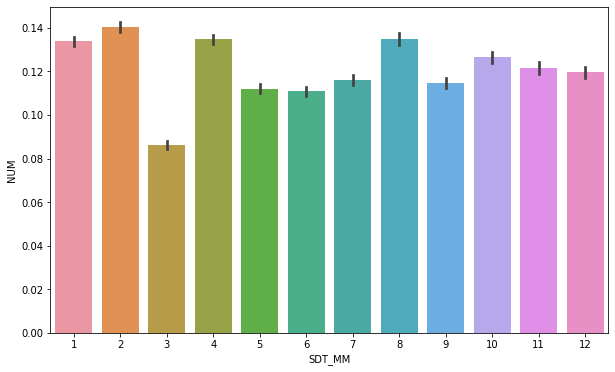

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='SDT_MM',y='NUM')

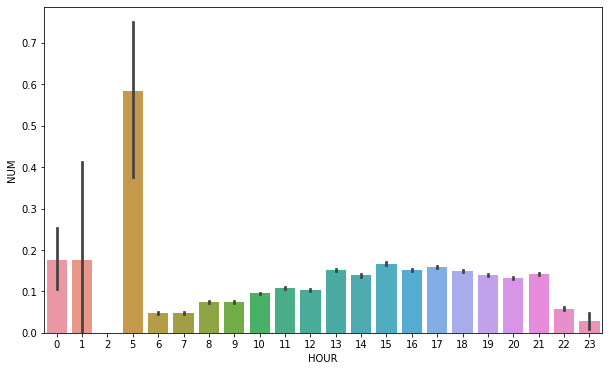

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='HOUR',y='NUM')

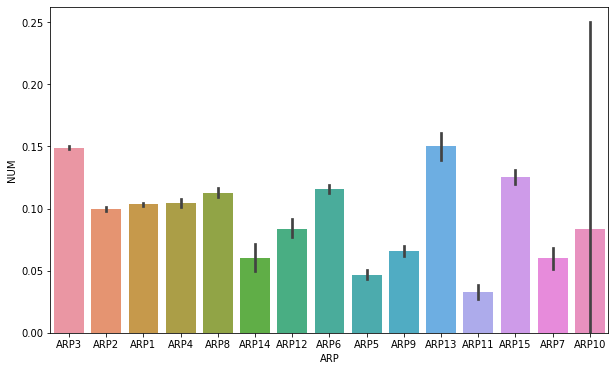

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='ARP',y='NUM')

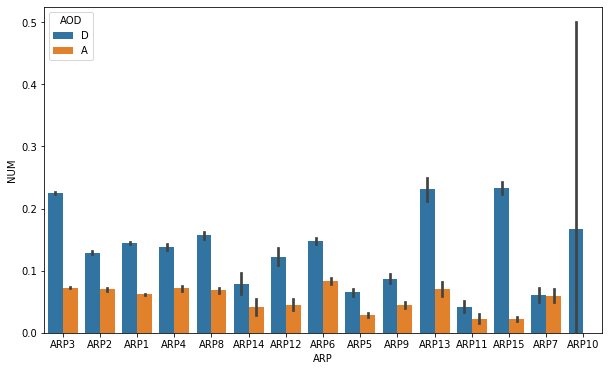

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='ARP',y='NUM',hue='AOD')

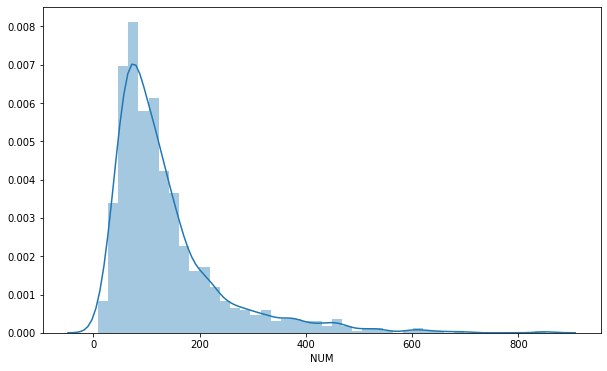

In [18]:
plot_data = data_afsnt[:].sort_values(by=['SDT_YY','SDT_MM','SDT_DD','STT'])
plot_data = plot_data.groupby(['DATE'])['NUM'].sum()
plt.figure(figsize=(10,6))
sns.distplot(plot_data)

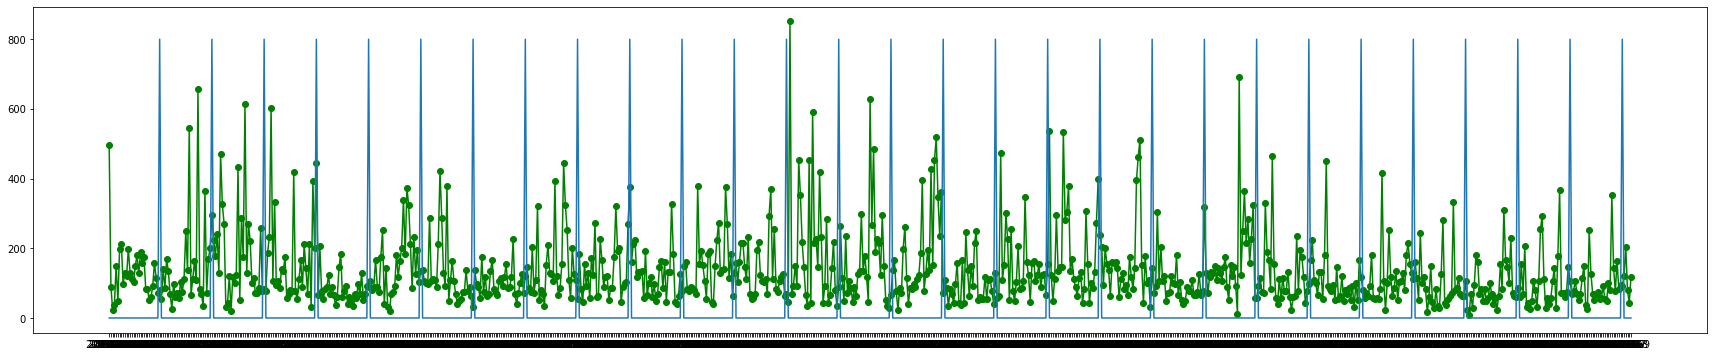

In [19]:
a = [0]*29+[800]
a = a*73
a = a[:875]

# 전체 기간 하루별 지연건수합
plt.figure(figsize=(30,6))
plt.plot(list(plot_data.index),plot_data,color='green',marker='o',linestyle='solid')
plt.plot(list(plot_data.index),a,linestyle='solid' )
plt.show()

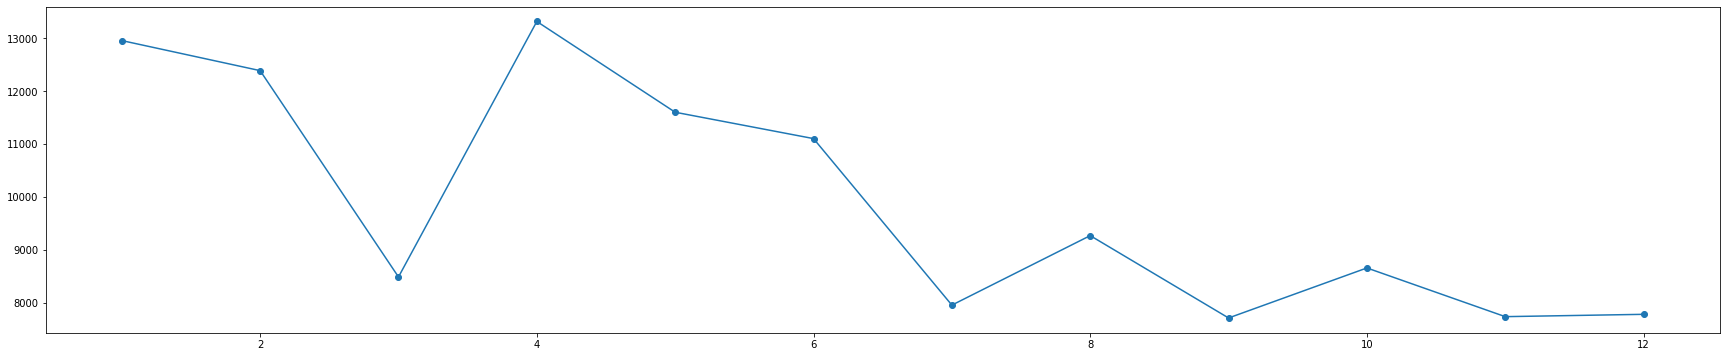

In [20]:
# 3년동안 월별 지연건수
plots_data = data_afsnt[:].sort_values(['SDT_YY','SDT_MM','SDT_DD'])
plots_data = plots_data.groupby(['SDT_MM'])['NUM'].sum()
plt.figure(figsize=(30,6))
plt.plot(list(plots_data.index),plots_data,marker='o',linestyle='solid')
plt.show()

No handles with labels found to put in legend.


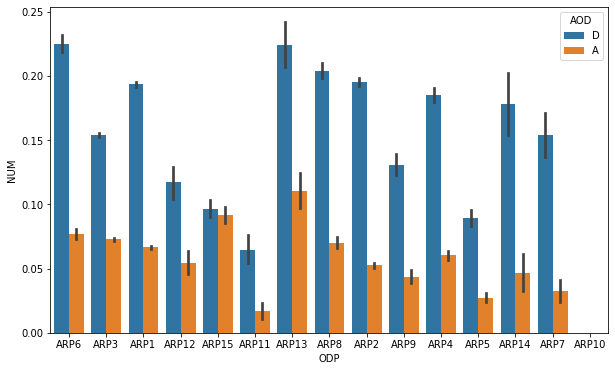

In [21]:
plt.figure(figsize=(10,6))
plt.legend(loc=1)
sns.barplot(data=data_afsnt,x='ODP',y='NUM',hue='AOD')


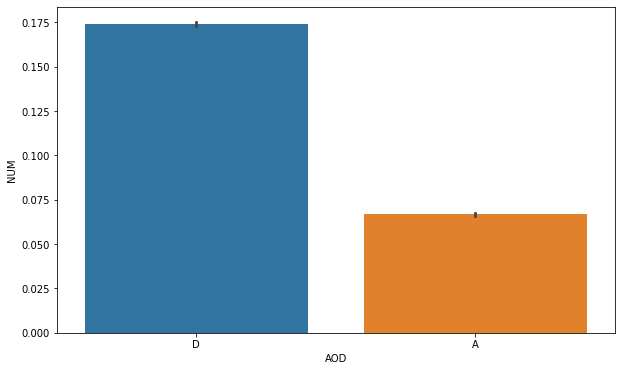

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_afsnt,x='AOD',y='NUM')

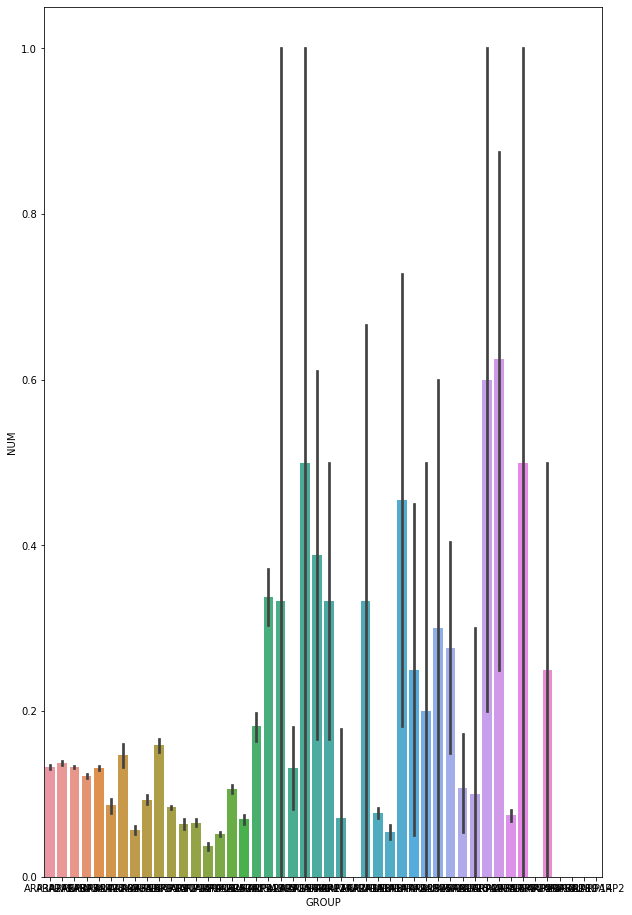

In [23]:
plt.figure(figsize=(10,16))
sns.barplot(data=data_afsnt,x='GROUP',y='NUM')

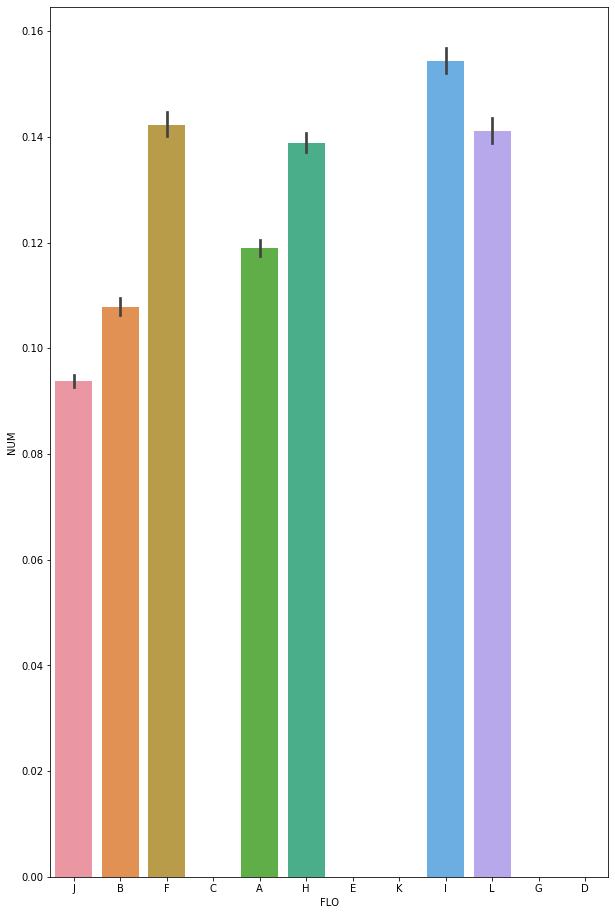

In [24]:
# G,E,C,D,K 는 부정기편이다.
plt.figure(figsize=(10,16))
sns.barplot(data=data_afsnt,x='FLO',y='NUM')

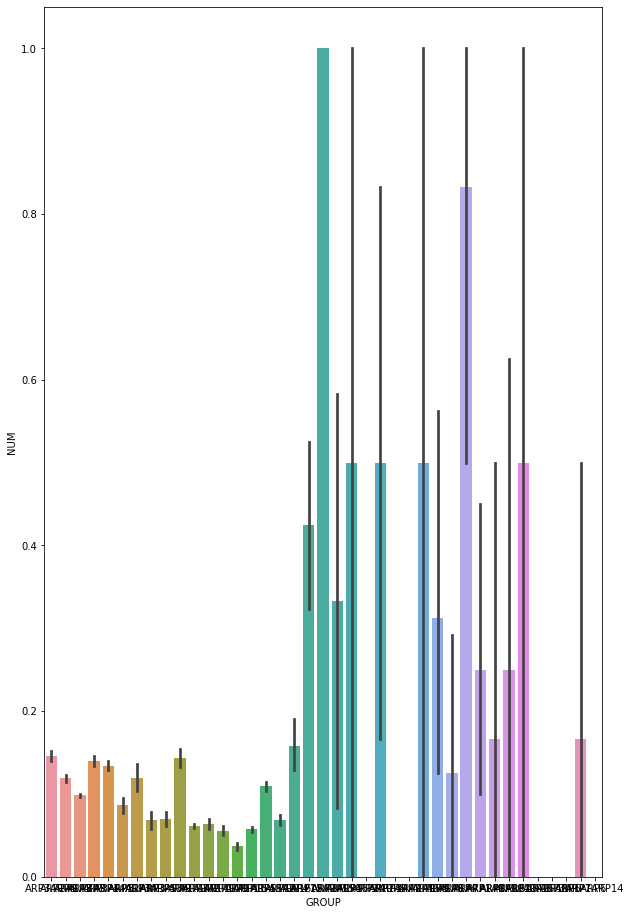

In [25]:
plt.figure(figsize=(10,16))
sns.barplot(data=data_afsnt[data_afsnt['FLO'] == 'J'],x='GROUP',y='NUM')

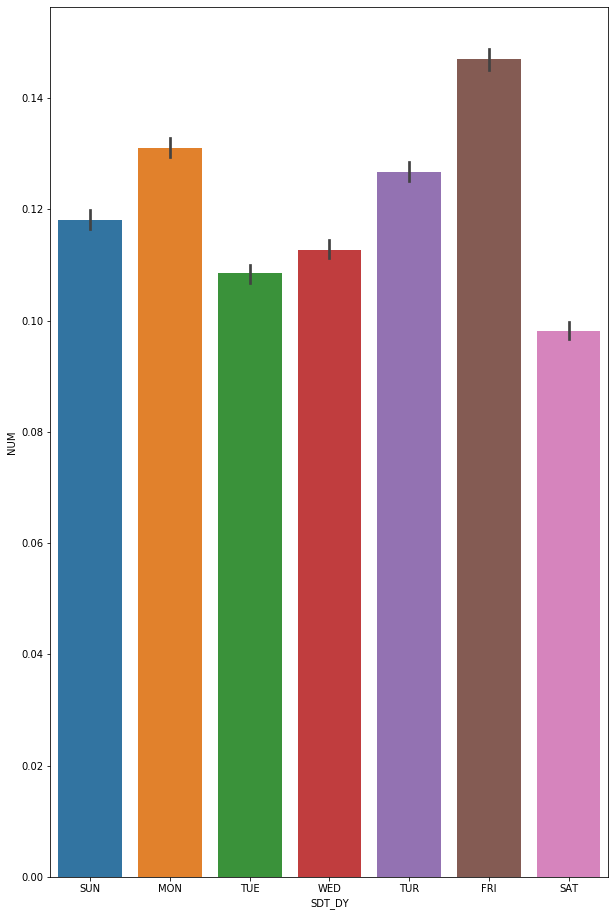

In [26]:
plt.figure(figsize=(10,16))
sns.barplot(data=data_afsnt, x='SDT_DY',y='NUM')

In [16]:
data_afsnt[data_afsnt['DRR'] == 'A01']['HOUR'].value_counts()

8     435
9     308
7     304
6     141
10    140
11     83
12     34
16     12
13     11
17     11
14     10
20      9
19      7
18      7
15      6
22      4
21      1
5       1
Name: HOUR, dtype: int64

In [17]:
data_afsnt.groupby('SDT_DY')['NUM'].value_counts()

SDT_DY  NUM
FRI     0      121849
        1       20993
MON     0      122926
        1       18540
SAT     0      127370
        1       13867
SUN     0      126872
        1       17001
TUE     0      124080
        1       15098
TUR     0      122067
        1       17726
WED     0      123608
        1       15712
Name: NUM, dtype: int64

In [18]:
afsnt_group = list(data_afsnt['GROUP'].value_counts().index)
afsnt_flo = list(data_afsnt['FLO'].value_counts().index)
afsnt_flt = list(data_afsnt['FLT'].value_counts().index)

In [19]:
sfsnt_group = list(data_sfsnt['GROUP'].value_counts().index)
sfsnt_flo = list(data_sfsnt['FLO'].value_counts().index)

In [20]:
afsnt_dly_group = list(data_afsnt_dly['GROUP'].value_counts().index)
afsnt_dly_flo = list(data_afsnt_dly['FLO'].value_counts().index)
afsnt_dly_flt = list(data_afsnt_dly['FLT'].value_counts().index)

In [21]:
# test 데이터에는 ARP10ARP3가 있지만 train 데이터에는 ARP10ARP3가 없다.
for i in afsnt_dly_group:
    if i in afsnt_group:
        continue
    else:
        print(i,'가 없다')

ARP10ARP3 가 없다


In [22]:
# test데이터에는 FLO에 M이 있지만 train 데이터에는 M이 없다.
for i in afsnt_dly_flo:
    if i in afsnt_flo:
        continue
    else:
        print('FLO에',i,'이 없다')

FLO에 M 이 없다


In [23]:
# FLT는 M사 제외하고 J도 없긴하지만 출발항공사와 도착항공사 알기때문에 큰 문제는 되지 않을 것이다.
for i in afsnt_dly_flt:
    if i in afsnt_flt:
        continue
    else:
        print('FLT에',i,'이 없다')
data_afsnt_dly[data_afsnt_dly['FLT'] == 'J1809']

FLT에 M1363 이 없다
FLT에 M1361 이 없다
FLT에 M1352 이 없다
FLT에 M1351 이 없다
FLT에 J1809 이 없다


,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,AOD,STT,DLY,DLY_RATE,GROUP
2083,2019,9,17,TUE,ARP4,ARP3,J,J1809,A,14:05,NaN,NaN,ARP3ARP4
2084,2019,9,17,TUE,ARP3,ARP4,J,J1809,D,13:00,NaN,NaN,ARP3ARP4
9578,2019,9,24,TUE,ARP4,ARP3,J,J1809,A,14:05,NaN,NaN,ARP3ARP4
9579,2019,9,24,TUE,ARP3,ARP4,J,J1809,D,13:00,NaN,NaN,ARP3ARP4


In [24]:
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,...,ATT,DLY,DRR,CNL,CNR,NUM,HOUR,GROUP,MINUTE,DATE
0,2017,1,1,SUN,ARP3,ARP6,J,J1955,SEw3NzE4,D,...,10:32,N,NaN,N,NaN,0,10,ARP3ARP6,5,201711
1,2017,1,1,SUN,ARP3,ARP6,J,J1954,SEw3NzE4,A,...,9:31,N,NaN,N,NaN,0,9,ARP3ARP6,30,201711
2,2017,1,1,SUN,ARP3,ARP6,J,J1956,SEw3NzE4,A,...,13:03,N,NaN,N,NaN,0,12,ARP3ARP6,45,201711


In [25]:
data_sfsnt.head(3)

,SSC,FLT,ORG,DES,STD,STA,FLO,MON,TUE,WED,...,SUN,FSD,FED,IRR,GROUP,STD_HOUR,STD_MINUTE,STA_HOUR,STA_MINUTE,DISTANCE
0,S19,A1915,ARP1,ARP3,7:55,9:05,A,Y,Y,Y,...,Y,20190331,20191026,N,ARP1ARP3,7,55,9,5,70
1,S19,A1904,ARP3,ARP1,7:55,9:05,A,Y,Y,Y,...,Y,20190331,20191026,N,ARP1ARP3,7,55,9,5,70
2,S19,I1304,ARP3,ARP1,8:00,9:15,I,Y,NaN,Y,...,Y,20190331,20191026,N,ARP1ARP3,8,0,9,15,75


In [26]:
# index로 활용하기 위해서 값들을 뽑아 list로 만드는 작업
# test = data_afsnt[['ARP','ODP','FLO']]
# l = []
# for i in range(len(test)):
#     l.append(list(test.iloc[i]))
#     if i % 100000 == 0:
#         print(i)


In [27]:
import pickle
# with open('index_for_distance.pkl', 'wb') as fout:
#      pickle.dump(l, fout)
with open('index_for_distance.pkl', 'rb') as fin:
    index_for_distance = []
    index_for_distance = pickle.load(fin)


In [28]:
sfsnt_groupby = data_sfsnt.groupby(['ORG','DES','FLO'])['DISTANCE'].mean()
sfsnt_groupby_index = [list(i) for i in sfsnt_groupby.index]

In [29]:
distance = []
# a = 0
# for i in index_for_distance:
#     if i in sfsnt_groupby_index:
#         val = sfsnt_groupby[i[0],i[1],i[2]]
#         distance.append(val)
#     else:
#         distance.append(np.NaN)
#     if a % 50000 == 0:
#         print(a)
#     a = a + 1
    

In [30]:
# distance도 pickle로 저장
# with open('distance_list.pkl', 'wb') as fout:
#      pickle.dump(distance, fout)
with open('distance_list.pkl', 'rb') as fin:
    distance = []
    distance = pickle.load(fin)
distance1 = distance[:]

In [31]:
data_afsnt['DISTANCE'] = distance
data_afsnt['FLIGHT_MEAN'] = distance1

In [32]:
data_afsnt[data_afsnt['DISTANCE'].isna() == True][['SDT_YY','SDT_MM','SDT_DD','ARP','ODP','FLO','REG','AOD','STT','GROUP','DISTANCE']].head(3)

,SDT_YY,SDT_MM,SDT_DD,ARP,ODP,FLO,REG,AOD,STT,GROUP,DISTANCE
511,2017,1,2,ARP1,ARP15,J,SEw3NDYw,D,6:20,ARP1ARP15,NaN
512,2017,1,2,ARP1,ARP15,J,SEw3NzY1,A,8:15,ARP1ARP15,NaN
3783,2017,1,13,ARP1,ARP15,J,SEw3NzE0,A,7:45,ARP1ARP15,NaN


In [33]:
data_afsnt['GROUP'].value_counts()

ARP1ARP3      446533
ARP2ARP3      116679
ARP1ARP2      105403
ARP3ARP6       68716
ARP3ARP8       58584
ARP3ARP4       57033
ARP1ARP5       25107
ARP15ARP2      20249
ARP1ARP9       15276
ARP3ARP9       10238
ARP13ARP3       8488
ARP1ARP8        7771
ARP3ARP5        7512
ARP1ARP11       7311
ARP1ARP12       7296
ARP15ARP4       7134
ARP3ARP7        6238
ARP14ARP3       3788
ARP1ARP4        2794
ARP12ARP3       2458
ARP1ARP15       1834
ARP15ARP3        769
ARP2ARP4         160
ARP1ARP6          93
ARP15ARP6         47
ARP1ARP7          28
ARP2ARP6          24
ARP7ARP8          20
ARP15ARP7         18
ARP4ARP6          17
ARP1ARP1          11
ARP2ARP5          10
ARP1ARP10         10
ARP15ARP5         10
ARP1ARP13          8
ARP2ARP7           8
ARP10ARP15         7
ARP2ARP8           6
ARP15ARP8          5
ARP1ARP14          4
ARP12ARP15         3
ARP2ARP9           2
ARP10ARP2          2
ARP6ARP9           2
ARP15ARP9          2
ARP14ARP15         1
Name: GROUP, dtype: int64

In [34]:
data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP3'][['SDT_YY','SDT_MM','SDT_DD','FLO','REG','ARP','ODP','AOD','STT','ATT','GROUP','DISTANCE']].sort_values(by=['FLO','SDT_YY','SDT_MM','SDT_DD','REG','STT']).head(5)

,SDT_YY,SDT_MM,SDT_DD,FLO,REG,ARP,ODP,AOD,STT,ATT,GROUP,DISTANCE
200273,2017,1,1,A,SEw3NzY5,ARP2,ARP3,D,15:05,15:20,ARP2ARP3,61.666667
200448,2017,1,1,A,SEw3NzY5,ARP3,ARP2,A,15:55,16:05,ARP2ARP3,58.333333
200449,2017,1,1,A,SEw3NzY5,ARP3,ARP2,D,17:20,17:38,ARP2ARP3,58.333333
200274,2017,1,1,A,SEw3NzY5,ARP2,ARP3,A,18:10,18:11,ARP2ARP3,61.666667
200279,2017,1,1,A,SEw3NzY5,ARP2,ARP3,D,18:40,18:57,ARP2ARP3,61.666667


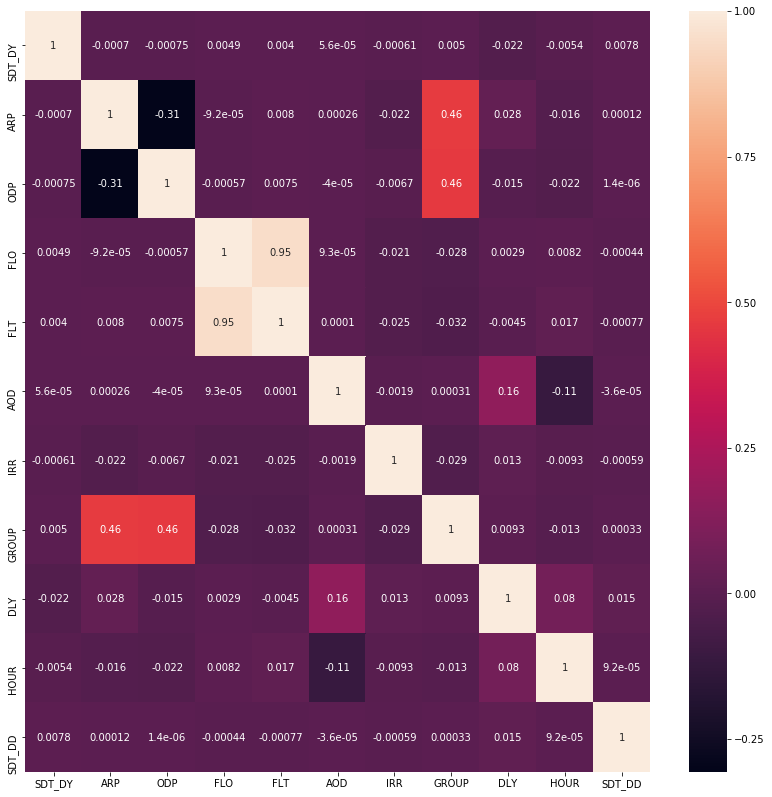

In [35]:
test_cor_data = data_afsnt[:]
# test_cor_data.info()
test_cor_data = test_cor_data.fillna('blank')
def Label_encoder(lis):
    features = ['SDT_DY','ARP','ODP','FLO','FLT','REG','AOD','IRR','DLY','DRR','CNL','CNR','GROUP']
    for i in features:
        le = LabelEncoder()
        le = le.fit(lis[i])
        lis[i] = le.transform(lis[i])
    return lis
test_cor_data = Label_encoder(test_cor_data)
# test_cor_data.info()

feat = test_cor_data[['SDT_DY','ARP','ODP','FLO','FLT','AOD','IRR','GROUP','DLY','HOUR','SDT_DD','DISTANCE']]
corr = feat.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)

# 비행시간 구하기

# distance 구하기

In [36]:
j_15_3 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP3'].index)
for i in j_15_3:
    distance[i] = 65
data_afsnt['DISTANCE'] = distance

In [37]:
j_1_12 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP12'].index)
for i in j_1_12:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [38]:
j_1_5 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP5'].index)
for i in j_1_5:
    distance[i] = 55
data_afsnt['DISTANCE'] = distance

In [39]:
j_1_2 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP2'].index)
for i in j_1_2:
    distance[i] = 55
data_afsnt['DISTANCE'] = distance

In [40]:
j_3_5 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP3ARP5'].index)
for i in j_3_5:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [41]:
j_15_2 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP2'].index)
for i in j_15_2:
    distance[i] = 65
data_afsnt['DISTANCE'] = distance

In [42]:
j_2_4 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP4'].index)
for i in j_2_4:
    distance[i] = 45
data_afsnt['DISTANCE'] = distance

In [43]:
j_3_7 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP3ARP7'].index)
for i in j_3_7:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [44]:
j_1_6 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP6'].index)
for i in j_1_6:
    distance[i] = 40
data_afsnt['DISTANCE'] = distance

In [45]:
j_15_4 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP4'].index)
for i in j_15_4:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [46]:
j_1_8 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP8'].index)
for i in j_1_8:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [47]:
j_1_4 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP4'].index)
for i in j_1_4:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [48]:
j_15_6 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP6'].index)
for i in j_15_6:
    distance[i] = 45
data_afsnt['DISTANCE'] = distance

In [49]:
j_1_7 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP7'].index)
for i in j_1_7:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [50]:
j_2_6 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP6'].index)
for i in j_2_6:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [51]:
j_7_8 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP7ARP8'].index)
for i in j_7_8:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [52]:
j_15_7 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP7'].index)
for i in j_15_7:
    distance[i] = 55
data_afsnt['DISTANCE'] = distance

In [53]:
j_4_6 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP4ARP6'].index)
for i in j_4_6:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [54]:
j_1_1 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP1'].index)
for i in j_1_1:
    distance[i] = 120
data_afsnt['DISTANCE'] = distance

In [55]:
j_15_5 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP15ARP5'].index)
for i in j_15_5:
    distance[i] = 175
data_afsnt['DISTANCE'] = distance

In [56]:
j_2_5 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP5'].index)
for i in j_2_5:
    distance[i] = 50
data_afsnt['DISTANCE'] = distance

In [57]:
j_1_10 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP10'].index)
for i in j_1_10:
    distance[i] = 53
data_afsnt['DISTANCE'] = distance

In [58]:
j_1_13 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP13'].index)
for i in j_1_13:
    distance[i] = 41.25
data_afsnt['DISTANCE'] = distance

In [59]:
j_2_7 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP7'].index)
for i in j_2_7:
    distance[i] = 46.25
data_afsnt['DISTANCE'] = distance

In [60]:
j_2_8 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP8'].index)
for i in j_2_8:
    distance[i] = 46.6
data_afsnt['DISTANCE'] = distance

In [61]:
j_1_14 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP1ARP14'].index)
for i in j_1_14:
    distance[i] = 35
data_afsnt['DISTANCE'] = distance

In [62]:
j_6_9 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP6ARP9'].index)
for i in j_6_9:
    distance[i] = 150
data_afsnt['DISTANCE'] = distance

In [63]:
j_2_9 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP2ARP9'].index)
for i in j_2_9:
    distance[i] = 40
data_afsnt['DISTANCE'] = distance

In [64]:
j_10_2 = list(data_afsnt[data_afsnt['GROUP'] == 'ARP10ARP2'].index)
for i in j_10_2:
    distance[i] = 60
data_afsnt['DISTANCE'] = distance

In [65]:
data_afsnt['DISTANCE'] = data_afsnt['DISTANCE'].fillna(data_afsnt['DISTANCE'].mean())
data_afsnt.head(3)

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,...,DRR,CNL,CNR,NUM,HOUR,GROUP,MINUTE,DATE,DISTANCE,FLIGHT_MEAN
0,2017,1,1,SUN,ARP3,ARP6,J,J1955,SEw3NzE4,D,...,NaN,N,NaN,0,10,ARP3ARP6,5,201711,65.833333,65.833333
1,2017,1,1,SUN,ARP3,ARP6,J,J1954,SEw3NzE4,A,...,NaN,N,NaN,0,9,ARP3ARP6,30,201711,65.833333,65.833333
2,2017,1,1,SUN,ARP3,ARP6,J,J1956,SEw3NzE4,A,...,NaN,N,NaN,0,12,ARP3ARP6,45,201711,65.833333,65.833333


In [66]:
import pickle
# with open('late.pkl', 'wb') as fout:
#      pickle.dump(late, fout)
with open('late.pkl', 'rb') as fin:
    late = []
    late = pickle.load(fin)


In [67]:
data_afsnt['FLO_LATE_TIME'] = late['FLO_TIME']

In [68]:
data_afsnt[data_afsnt['DRR']=='C02']['GROUP'].value_counts()[0:23]

ARP1ARP3     54943
ARP2ARP3     14897
ARP3ARP6      8224
ARP1ARP2      7611
ARP3ARP8      7314
ARP3ARP4      6635
ARP13ARP3     1292
ARP1ARP5      1032
ARP3ARP9       923
ARP1ARP9       885
ARP15ARP2      764
ARP1ARP8       537
ARP3ARP5       379
ARP12ARP3      346
ARP3ARP7       343
ARP1ARP12      329
ARP14ARP3      293
ARP15ARP3      222
ARP15ARP4      220
ARP1ARP15      209
ARP1ARP11      184
ARP1ARP4       101
ARP2ARP4        17
Name: GROUP, dtype: int64

In [69]:
ind = []
val = []
ind = list(data_afsnt[data_afsnt['DRR']=='C02']['GROUP'].value_counts().index[0:23])
val = list(data_afsnt[data_afsnt['DRR']=='C02']['GROUP'].value_counts().values[0:23])
name = ['c02'+str(i) for i in ind]
blank = []

for i,j,k in zip(ind,val,name):
    blank.append(j/data_afsnt[data_afsnt['GROUP'] == i]['DRR'].count())
 

In [70]:
def categorical_c02(x):
    count = 0
    for i,j in zip(ind,blank):
        if x == i:
            x = j
            break
        else:
            count = count + 1
        if count == 23:
            x = 0
            break
    return x
        

data_afsnt['C02'] =0
data_afsnt['C02'] = data_afsnt['GROUP'].apply(lambda x : categorical_c02(x))

In [71]:
data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()

J    747
A    364
B    293
H    196
F    192
I    136
L    103
Name: FLO, dtype: int64

In [72]:
ind1 = []
val1 = []
ind1 = list(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts().index)
val1 = list(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts().values)
name1 = ['c01'+str(i) for i in ind1]
blank1 = []

for i,j,k in zip(ind1,val1,name1):
    blank1.append(j/data_afsnt[data_afsnt['FLO'] == i]['DRR'].count())

In [73]:
def categorical_c01(x):
    count = 0
    for i,j in zip(ind1,blank1):
        if x == i:
            x = j
            break
        else:
            count = count + 1
        if count == 7:
            x = 0
            break
    return x
        

data_afsnt['C01'] =0
data_afsnt['C01'] = data_afsnt['FLO'].apply(lambda x : categorical_c01(x))

In [74]:
data_afsnt[data_afsnt['DRR']=='A01']['HOUR'].value_counts()

8     435
9     308
7     304
6     141
10    140
11     83
12     34
16     12
13     11
17     11
14     10
20      9
19      7
18      7
15      6
22      4
21      1
5       1
Name: HOUR, dtype: int64

In [75]:
ind2 = []
val2 = []
ind2 = list(data_afsnt[data_afsnt['DRR']=='A01']['HOUR'].value_counts().index[0:16])
val2 = list(data_afsnt[data_afsnt['DRR']=='A01']['HOUR'].value_counts().values[0:16])
name2 = ['a01'+str(i) for i in ind2]
blank2 = []

for i,j,k in zip(ind2,val2,name2):
    blank2.append(j/data_afsnt[data_afsnt['HOUR'] == i]['DRR'].count())

In [76]:
def categorical_a01(x):
    count = 0
    for i,j in zip(ind2,blank2):
        if x == i:
            x = j
            break
        else:
            count = count + 1
        if count == 16:
            x = 0
            break
    return x
        

data_afsnt['A01'] =0
data_afsnt['A01'] = data_afsnt['HOUR'].apply(lambda x : categorical_a01(x))

In [77]:
# c01_j = data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[0]/data_afsnt[data_afsnt['FLO'] == 'J']['DRR'].count()
# c01_a = data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[1]/data_afsnt[data_afsnt['FLO'] == 'A']['DRR'].count()
# c01_b = data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[2]/data_afsnt[data_afsnt['FLO'] == 'B']['DRR'].count()
# c01_h = data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[3]/data_afsnt[data_afsnt['FLO'] == 'H']['DRR'].count()
# c01_f = data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[4]/data_afsnt[data_afsnt['FLO'] == 'F']['DRR'].count()
# c01_i = data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[5]/data_afsnt[data_afsnt['FLO'] == 'I']['DRR'].count()
# c01_l = data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[6]/data_afsnt[data_afsnt['FLO'] == 'L']['DRR'].count()

# # print(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[0]/data_afsnt[data_afsnt['FLO'] == 'J']['DRR'].count())
# # print(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[1]/data_afsnt[data_afsnt['FLO'] == 'A']['DRR'].count())
# # print(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[2]/data_afsnt[data_afsnt['FLO'] == 'B']['DRR'].count())
# # print(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[3]/data_afsnt[data_afsnt['FLO'] == 'H']['DRR'].count())
# # print(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[4]/data_afsnt[data_afsnt['FLO'] == 'F']['DRR'].count())
# # print(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[5]/data_afsnt[data_afsnt['FLO'] == 'I']['DRR'].count())
# # print(data_afsnt[data_afsnt['DRR']=='C01']['FLO'].value_counts()[6]/data_afsnt[data_afsnt['FLO'] == 'L']['DRR'].count())

In [78]:
# def categorical_c01(x):
#     if x == 'J':
#         x = c01_j
#     elif x == 'A':
#         x = c01_a
#     elif x == 'H':
#         x = c01_h
#     elif x == 'I':
#         x = c01_i
#     elif x == 'B':
#         x = c01_b
#     elif x == 'F':
#         x = c01_f
#     elif x == 'L':
#         x = c01_l
#     else:
#         x = 0
#     return x

# data_afsnt['C01'] =0
# data_afsnt['C01'] = data_afsnt['FLO'].apply(lambda x : categorical_c01(x))

In [302]:
temp = data_afsnt[:]
def drop_features(df):
    temps = df.drop(['GROUP','FLT','SDT_YY','SDT_MM','DATE','FLIGHT_MEAN','NUM','SDT_DD','REG','MINUTE','IRR','STT','ATT','DRR','CNL','CNR'],axis = 1, inplace = False)
    return temps
temps = drop_features(temp)
temps.head(3)

,SDT_DY,ARP,ODP,FLO,AOD,DLY,HOUR,DISTANCE,FLO_LATE_TIME,C02,C01,A01
0,SUN,ARP3,ARP6,J,D,N,10,65.833333,0.364749,0.899781,0.028824,0.022676
1,SUN,ARP3,ARP6,J,A,N,9,65.833333,0.030233,0.899781,0.028824,0.057175
2,SUN,ARP3,ARP6,J,A,N,12,65.833333,0.030233,0.899781,0.028824,0.005543


In [303]:
from sklearn.preprocessing import LabelEncoder
def encode_features(dataDF):
    features = ['SDT_DY','FLO','ARP','AOD','DLY','ODP']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

temps = encode_features(temps)
temps['DISTANCE'] = temps['DISTANCE'].apply(lambda x : (x-35)/140)
temps.head(3)

,SDT_DY,ARP,ODP,FLO,AOD,DLY,HOUR,DISTANCE,FLO_LATE_TIME,C02,C01,A01
0,3,8,11,9,1,0,10,0.220238,0.364749,0.899781,0.028824,0.022676
1,3,8,11,9,0,0,9,0.220238,0.030233,0.899781,0.028824,0.057175
2,3,8,11,9,0,0,12,0.220238,0.030233,0.899781,0.028824,0.005543


In [304]:
# # test train 데이터 나누기 838468
y = temps['DLY']
x = temps.drop('DLY',axis = 1)
# X_train = x[:838468]
# X_test = x[838468:]
# y_train = y[:838468]
# y_test = y[838468:]

In [305]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)

In [306]:
# over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio = 0.7)
X_train_over, y_train_over = smote.fit_sample(X_train,y_train)
print(X_train.shape,y_train.shape)
print(X_train_over.shape,y_train_over.shape)
print(pd.Series(y_train_over).value_counts())

(839552, 11) (839552,)
(1255305, 11) (1255305,)
0    738415
1    516890
dtype: int64


In [289]:
# #### oversampling 직접 구현   1대1로 맞추지 않고 조금 부족하게 맞추기 위해서(오래걸림 주의....)
# import random as rd
# import math
# X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# sampling_index = list(y_train[y_train==1].index)
# nums = len(sampling_index)
# a = []
# for i in range(400000):
#     ind = rd.randint(0,nums-1)
#     ind_value = sampling_index[ind]
#     a.append(ind_value)

# dy = []
# arp = []
# odp = []
# flo = []
# aod = []
# hour = []
# dist = []
# flo_late = []
# c02 = []
# c01 = []
# a01 = []
# for i,j in zip(range(400000),a):
#     tm = X_train.loc[j]
#     dy.append(tm[0])
#     arp.append(tm[1])
#     odp.append(tm[2])
#     flo.append(tm[3])
#     aod.append(tm[4])
#     hour.append(tm[5])
#     dist.append(tm[6])
#     flo_late.append(tm[7])
#     c02.append(tm[8])
#     c01.append(tm[9])
#     a01.append(tm[10])
#     if i % 50000 == 0:
#         print(i)


# sampling = pd.DataFrame({'SDT_DY':dy,'ARP':arp,'ODP':odp,'FLO':flo,'AOD':aod,'HOUR':hour,'DISTANCE':dist,'FLO_LATE_TIME':flo_late,'C02':c02,'C01':c01,'A01':a01})
# yt_list = list(y_train.values)

# label = []
# for i in a:
#     label.append(yt_list[i])

# ytdf = pd.Series(label)
# X_train_over = pd.concat([X_train,sampling])
# y_train_over = pd.concat([y_train,ytdf])

# print(X_train.shape,y_train.shape)
# print(X_train_over.shape,y_train_over.shape)
# print(pd.Series(y_train_over).value_counts())

In [312]:
X_train_over = pd.DataFrame(X_train_over,columns=X_train.columns)
X_train_over['interaction1'] = [i*j for i,j in zip(X_train_over['DISTANCE'], X_train_over['FLO_LATE_TIME']) ]
# X_train_over['interaction2'] = [i*j for i,j in zip(X_train_over['C02'], X_train_over['AOD']) ]
# X_train_over['interaction3'] = [i*j for i,j in zip(X_train_over['ARP'], X_train_over['C01']) ]
X_test['interaction1'] = [i*j for i,j in zip(X_test['DISTANCE'], X_test['FLO_LATE_TIME']) ]
# X_test['interaction2'] = [i*j for i,j in zip(X_test['C02'], X_test['AOD']) ]
# X_test['interaction3'] = [i*j for i,j in zip(X_test['ARP'], X_test['C01']) ]
X_train['interaction1'] = [i*j for i,j in zip(X_train['DISTANCE'], X_train['FLO_LATE_TIME']) ]
# X_train['interaction2'] = [i*j for i,j in zip(X_train['C02'], X_train['AOD']) ]
# X_train['interaction3'] = [i*j for i,j in zip(X_train['ARP'], X_train['C01']) ]
print(X_train.shape,y_train.shape)
print(X_train_over.shape,y_train_over.shape)
print(pd.Series(y_train_over).value_counts())

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(839552, 12) (839552,)
(1255305, 12) (1255305,)
0    738415
1    516890
dtype: int64


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [313]:
# X_train = X_train.drop(['interaction2','interaction3'],axis=1)
# X_train_over = X_train_over.drop(['interaction2','interaction3'],axis=1)
# X_test = X_test.drop(['interaction2','interaction3'],axis=1)

In [314]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


# 결정트리, random forest, 로지스틱 회귀
dt_clf = DecisionTreeClassifier()
dt2_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred1 = dt_clf.predict(X_test)
print('DecisionTree1 정확도: ', accuracy_score(y_test,dt_pred1))

dt2_clf.fit(X_train_over,y_train_over)
dt_pred2 = dt2_clf.predict(X_test)
print('DecisionTree2 정확도: ', accuracy_score(y_test,dt_pred2))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train_over,y_train_over)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도: ', accuracy_score(y_test,rf_pred))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train_over,y_train_over)
lr_pred= lr_clf.predict(X_test)
print('Logist 정확도: ', accuracy_score(y_test,lr_pred))


DecisionTree1 정확도:  0.8801204128053349
DecisionTree2 정확도:  0.7628934171183271


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest 정확도:  0.7611047739897541


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logist 정확도:  0.7103613059119718


In [315]:
# 오차행렬
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, dt_pred1)
print('decision_tree:\n', cm)
cm  = confusion_matrix(y_test, dt_pred2)
print('decision_tree:\n', cm)
cm  = confusion_matrix(y_test, rf_pred)
print('random_forest:\n', cm)
cm  = confusion_matrix(y_test, lr_pred)
print('logistic:\n', cm)


decision_tree:
 [[129669    688]
 [ 17073    727]]
decision_tree:
 [[103448  26909]
 [  8220   9580]]
random_forest:
 [[103104  27253]
 [  8141   9659]]
logistic:
 [[95404 34953]
 [ 7959  9841]]


In [316]:
print('Feature importance:\n{0}'.format(dt_clf.feature_importances_))
print('Feature importance:\n{0}'.format(rf_clf.feature_importances_))
print('Feature importance:\n{0}'.format(lr_clf.coef_))

Feature importance:
[0.10225093 0.02507081 0.02454736 0.02608966 0.00630484 0.09288823
 0.03972043 0.12123196 0.02023164 0.01962631 0.213456   0.30858183]
Feature importance:
[0.22487302 0.02150795 0.01695693 0.01753748 0.09181784 0.13026609
 0.02688186 0.15291648 0.02606299 0.02749915 0.14232734 0.12135289]
Feature importance:
[[-3.61730362e-02  1.37111628e-02 -1.90438230e-03 -7.21857465e-03
   6.05006000e-01  2.23643778e-02  1.09942101e+00  2.17771749e+00
  -3.46786521e-03 -1.51475731e+01 -8.91218781e+00 -1.05250028e+00]]


In [317]:
# 평가함수, ROC커브 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_curve


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:4f}, 정밀도: {1:4f}, 재현율: {2:4f}'.format(accuracy,precision,recall))
    print('f1스코어: {0:4f}'.format(f1))

def roc_curve_plot(y_test,pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label = 'ROC')
    #가운데 대각선 직선
    plt.plot([0,1],[0,1],'k--',label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)'); plt.ylabel('TPR(recall)')
    plt.legend()

In [318]:
# 평가하기
get_clf_eval(y_test,dt_pred1)
get_clf_eval(y_test,dt_pred2)
get_clf_eval(y_test,rf_pred)
get_clf_eval(y_test,lr_pred)
# get_clf_eval(y_test,preds_xg)

오차행렬
[[129669    688]
 [ 17073    727]]
정확도: 0.880120, 정밀도: 0.513781, 재현율: 0.040843
f1스코어: 0.075670
오차행렬
[[103448  26909]
 [  8220   9580]]
정확도: 0.762893, 정밀도: 0.262545, 재현율: 0.538202
f1스코어: 0.352926
오차행렬
[[103104  27253]
 [  8141   9659]]
정확도: 0.761105, 정밀도: 0.261676, 재현율: 0.542640
f1스코어: 0.353085
오차행렬
[[95404 34953]
 [ 7959  9841]]
정확도: 0.710361, 정밀도: 0.219695, 재현율: 0.552865
f1스코어: 0.314439


In [319]:
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_test,dt_pred1)))
print(math.sqrt(mean_squared_error(y_test,dt_pred2)))
print(math.sqrt(mean_squared_error(y_test,rf_pred)))
print(math.sqrt(mean_squared_error(y_test,lr_pred)))

0.34623631697825275
0.48693591249945084
0.48876909273218766
0.5381809120435509


In [330]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_curve

def roc_curve_plot(y_test,pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label = 'ROC')
    #가운데 대각선 직선
    plt.plot([0,1],[0,1],'k--',label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)'); plt.ylabel('TPR(recall)')
    plt.legend()

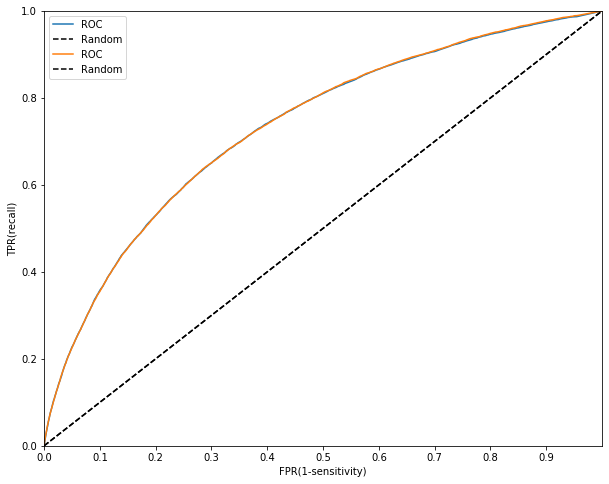

In [332]:
plt.figure(figsize=(10,8))
pred_proba1 = dt_clf.predict_proba(X_test)
pred_proba1_2 = dt2_clf.predict_proba(X_test)
pred_proba2 = rf_clf.predict_proba(X_test)
pred_proba3 = lr_clf.predict_proba(X_test)

# roc_curve_plot(y_test,pred_proba1[:,1])
roc_curve_plot(y_test,pred_proba1_2[:,1])
roc_curve_plot(y_test,pred_proba2[:,1])
# roc_curve_plot(y_test,pred_proba3[:,1])

In [322]:
print(pd.crosstab(y_test,rf_pred,rownames = ['Actual'],colnames=['Predict']))

Predict       0      1
Actual                
0        103104  27253
1          8141   9659
